In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

url = "http://api.openweathermap.org/data/2.5/weather?"

df_main = pd.DataFrame(columns = ["City","Latitude","Longitude","Max_Temp(F)","Humidity(%)","Cloudiness(%)","Wind Speed(mph)"])

# query_url = url + "appid=" + weather_api_key + "&q=" + cities[1]
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# pprint(weather_json)

count = 0

print("Beginning Data Retrieval\n-----------------------------------------")
for n in np.arange(0,len(cities)):
    query_url = url + "appid=" + weather_api_key + "&q=" + cities[n]
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        print("Processing Record {} | {}".format(n,weather_json["name"]))
        city_name = weather_json["name"]
        Lat_f = weather_json["coord"]["lat"]
        Lon_f = weather_json["coord"]["lon"]
        temp_f = round((int(weather_json["main"]["temp_max"]) - 273.15) * 9/5 + 32,2)
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind_speed_mph = round(weather_json["wind"]["speed"] / 1609 *3600,2)

        new_row=[]
        new_row.append(city_name)
        new_row.append(Lat_f)
        new_row.append(Lon_f)
        new_row.append(temp_f)
        new_row.append(humidity)
        new_row.append(cloud)
        new_row.append(wind_speed_mph)
        
        df_main.loc[count] = new_row
        count = count + 1
    except:
        print("City not found. Skipping...".format(n))

print("------------------------------------------------\nDATA RETRIEVAL COMPLETE\n------------------------------------------------")

        

Beginning Data Retrieval
-----------------------------------------
Processing Record 0 | Lorengau
Processing Record 1 | Hit
Processing Record 2 | Ushuaia
Processing Record 3 | Longyearbyen
Processing Record 4 | Arraial do Cabo
Processing Record 5 | Tezu
Processing Record 6 | Pogaceaua
Processing Record 7 | Hong Kong
Processing Record 8 | Saint George
Processing Record 9 | Mar del Plata
Processing Record 10 | Hithadhoo
Processing Record 11 | Hermanus
Processing Record 12 | Busselton
Processing Record 13 | Lebu
Processing Record 14 | Tocopilla
Processing Record 15 | Puerto Ayora
Processing Record 16 | Stepnoye
Processing Record 17 | Pevek
Processing Record 18 | Tiksi
Processing Record 19 | Qaanaaq
Processing Record 20 | Kapaa
Processing Record 21 | Itacarambi
Processing Record 22 | Villa Maria
Processing Record 23 | Atar
Processing Record 24 | Port Alfred
Processing Record 25 | Mataura
Processing Record 26 | Beringovskiy
Processing Record 27 | Kavaratti
Processing Record 28 | Cape Town
P

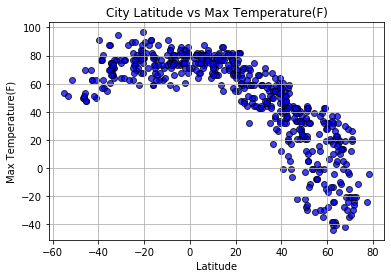

In [4]:
# Plot 1 - Scatter Plot - City Latitude vs Max Temperature

plt.scatter(df_main["Latitude"], df_main["Max_Temp(F)"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Max Temperature(F)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.show()

#### Latitude vs. Humidity Plot

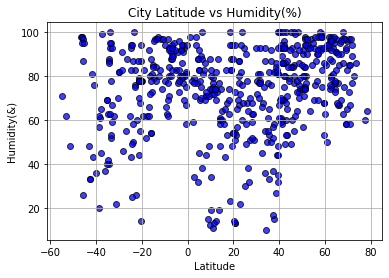

In [5]:
plt.scatter(df_main["Latitude"], df_main["Humidity(%)"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Humidity(%)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(&)")
plt.show()

#### Latitude vs. Cloudiness Plot

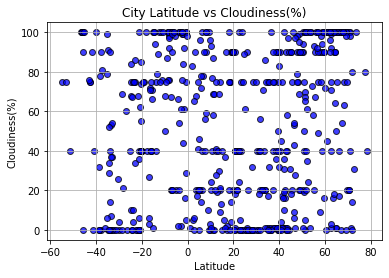

In [6]:
plt.scatter(df_main["Latitude"], df_main["Cloudiness(%)"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Cloudiness(%)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

#### Latitude vs. Wind Speed Plot

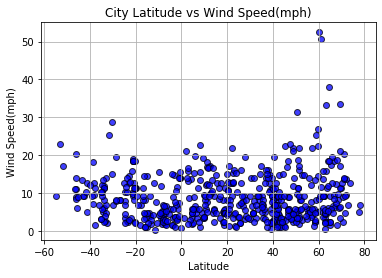

In [7]:
plt.scatter(df_main["Latitude"], df_main["Wind Speed(mph)"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Wind Speed(mph)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [8]:
# Create Northern and Southern Hemisphere DataFrames

df_main_north = df_main[df_main["Latitude"] > 0]
df_main_south = df_main[df_main["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

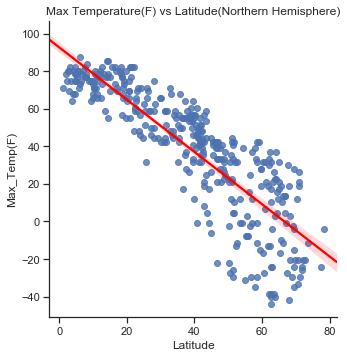

In [9]:
sns.set(style ="ticks",color_codes=True)
sns.pairplot(x_vars="Latitude",y_vars="Max_Temp(F)", data = df_main_north, kind="reg", plot_kws={"line_kws":{"color":"red"}}, height = 5)
plt.title("Max Temperature(F) vs Latitude(Northern Hemisphere)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

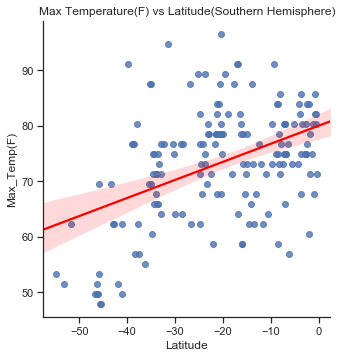

In [10]:
sns.set(style ="ticks",color_codes=True)
sns.pairplot(x_vars="Latitude",y_vars="Max_Temp(F)", data = df_main_south, kind="reg", plot_kws={"line_kws":{"color":"red"}}, height = 5)
plt.title("Max Temperature(F) vs Latitude(Southern Hemisphere)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

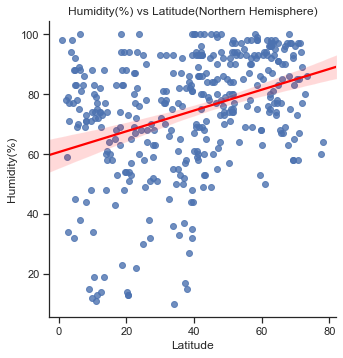

In [12]:
sns.set(style ="ticks",color_codes=True)
sns.pairplot(x_vars="Latitude",y_vars="Humidity(%)", data = df_main_north, kind="reg", plot_kws={"line_kws":{"color":"red"}}, height = 5)
plt.title("Humidity(%) vs Latitude(Northern Hemisphere)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

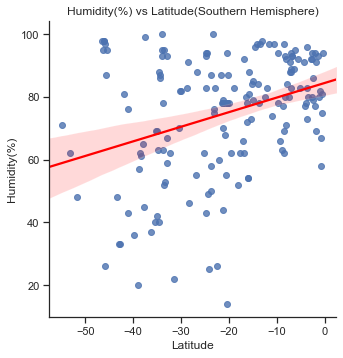

In [13]:
sns.set(style ="ticks",color_codes=True)
sns.pairplot(x_vars="Latitude",y_vars="Humidity(%)", data = df_main_south, kind="reg", plot_kws={"line_kws":{"color":"red"}}, height = 5)
plt.title("Humidity(%) vs Latitude(Southern Hemisphere)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

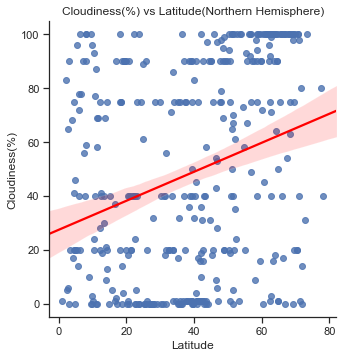

In [14]:
sns.set(style ="ticks",color_codes=True)
sns.pairplot(x_vars="Latitude",y_vars="Cloudiness(%)", data = df_main_north, kind="reg", plot_kws={"line_kws":{"color":"red"}}, height = 5)
plt.title("Cloudiness(%) vs Latitude(Northern Hemisphere)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

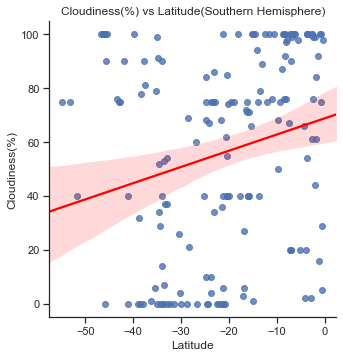

In [15]:
sns.set(style ="ticks",color_codes=True)
sns.pairplot(x_vars="Latitude",y_vars="Cloudiness(%)", data = df_main_south, kind="reg", plot_kws={"line_kws":{"color":"red"}}, height = 5)
plt.title("Cloudiness(%) vs Latitude(Southern Hemisphere)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

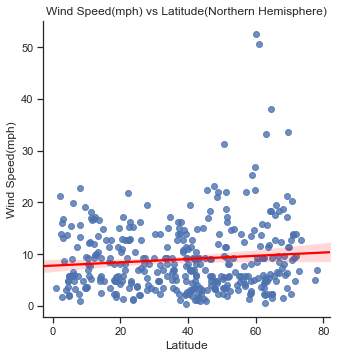

In [16]:
sns.set(style ="ticks",color_codes=True)
sns.pairplot(x_vars="Latitude",y_vars="Wind Speed(mph)", data = df_main_north, kind="reg", plot_kws={"line_kws":{"color":"red"}}, height = 5)
plt.title("Wind Speed(mph) vs Latitude(Northern Hemisphere)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

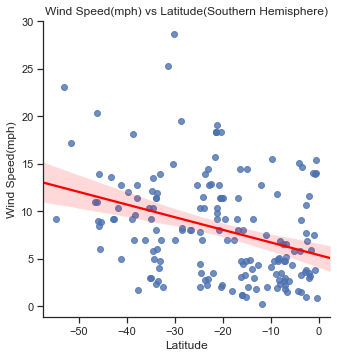

In [17]:
sns.set(style ="ticks",color_codes=True)
sns.pairplot(x_vars="Latitude",y_vars="Wind Speed(mph)", data = df_main_south, kind="reg", plot_kws={"line_kws":{"color":"red"}}, height = 5)
plt.title("Wind Speed(mph) vs Latitude(Southern Hemisphere)")
plt.show()